# Recall vs. AUPRC

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
from pathlib import Path

In [2]:
plt.style.use('science')

In [3]:
date = "2023-03-14-22-37-07"
experiment = "hatexplain-lime-distilbert-2"

here_path = Path().absolute()
experiments_path = here_path.parent / "data" / "experiments"
experiment_path = experiments_path / date / experiment
results_path = experiment_path / "results.jsonl"

In [4]:
results = []
with open(results_path, 'r') as f:
    for line in f:
        results.append(json.loads(line))

In [5]:
all_results = sorted(results, key=lambda x: x['weight'])
weights = [result['weight'] for result in results]

In [6]:
weights = weights[1:]
all_results = all_results[1:]

In [7]:
def filter_results(results):
    """Filter the results.

    Remove the None and NaN values from the results.

    Args:
        results (list of float): Results to filter.
    
    Returns:
        list of float: Filtered results.
    """
    return [result for result in results \
        if result is not None and not np.isnan(result)]

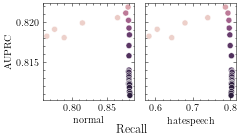

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(4, 2))

x = []
y = []
for results in all_results:
    x.append(results['performance']['recall_normal'])
    y.append(
        np.mean(
            filter_results(results['explainability']['alternative_auprc'])
        )
    )
sns.scatterplot(
    x="normal",
    y="AUPRC",
    data=pd.DataFrame({
        "normal": x,
        "AUPRC": y,
    }),
    hue=weights,
    ax=axes[0],
)

x = []
y = []
for results in all_results:
    x.append(results['performance']['recall_hatespeech'])
    y.append(
        np.mean(
            filter_results(results['explainability']['alternative_auprc'])
        )
    )
sns.scatterplot(
    x="hatespeech",
    y="AUPRC",
    data=pd.DataFrame({
        "hatespeech": x,
        "AUPRC": y,
    }),
    hue=weights,
    ax=axes[1],
)

axes[0].get_legend().remove()
axes[1].get_legend().remove()

# norm = plt.Normalize(0, max(weights))
# cmap = sns.cubehelix_palette(as_cmap=True)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.colorbar(
#     sm,
#     orientation="vertical",
#     label="Cross-entropy weight ($w_1$)",
# )

fig.tight_layout(rect=(0, 0, 0.9, 1))
fig.supxlabel("Recall")
# fig.text(0.52, -0.15, "Recall", ha='center')
plt.savefig("recall_auprc.pdf", dpi=300, bbox_inches="tight")